# Install and import necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Flatten, Dense



# load the dataset

In [ ]:
# Load the IMDb movie reviews dataset
vocab_size = 10000  # Number of most frequent words to keep in the vocabulary
max_length = 200    # Maximum length of the sequences (truncated or padded)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Preprocess the data
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)


17464789/17464789 [==============================] - 0s 0us/step


# dataset visualization

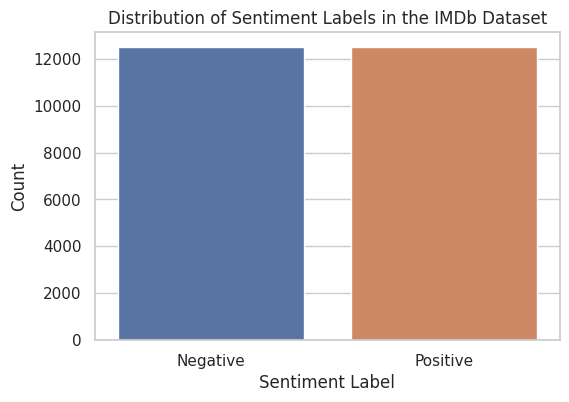

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Map the word indices back to words
word_index = imdb.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}
pad_token = "<PAD>"

# Helper function to decode the movie review from the word indices
def decode_review(review):
    return ' '.join([reverse_word_index.get(i, pad_token) for i in review])

# Count the number of positive and negative sentiment labels
num_positive = np.sum(y_train == 1)
num_negative = np.sum(y_train == 0)

# Plot the sentiment label distribution using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.title("Distribution of Sentiment Labels in the IMDb Dataset")
plt.show()

# Plot a few movie reviews with their sentiment labels



# Create and train  models

In [ ]:

embedding_dim = 128
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(64))  # Use an LSTM layer instead of Flatten
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 3
batch_size = 32

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/3
625/625 [==============================] - 65s 99ms/step - loss: 0.4325 - accuracy: 0.7998 - val_loss: 0.3158 - val_accuracy: 0.8664
Epoch 2/3
625/625 [==============================] - 18s 28ms/step - loss: 0.2573 - accuracy: 0.8988 - val_loss: 0.3082 - val_accuracy: 0.8774
Epoch 3/3
625/625 [==============================] - 17s 27ms/step - loss: 0.1738 - accuracy: 0.9366 - val_loss: 0.3294 - val_accuracy: 0.8722


In [ ]:

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")


782/782 [==============================] - 4s 5ms/step - loss: 0.3499 - accuracy: 0.8632
Test accuracy: 0.8632400035858154


# Visualize the results

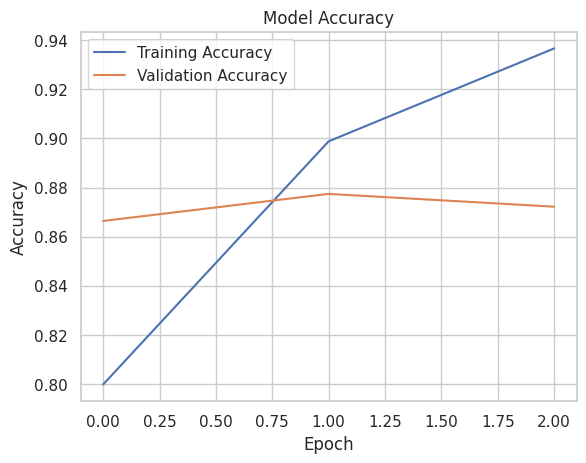

In [ ]:
# Plot the accuracy graph
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot the accuracy graph
plot_accuracy(history)

# prediction

In [ ]:
# Example review to predict
review = "The movie was amazing! The plot was captivating, and the acting was brilliant."

# Preprocess the review and convert it to a sequence
word_index = imdb.get_word_index()
review_sequence = [word_index.get(word, 0) for word in review.lower().split()]
review_sequence = pad_sequences([review_sequence], maxlen=max_length, padding='pre')

# Predict sentiment for the review
prediction = model.predict(review_sequence)
sentiment = "positive" if prediction[0][0] >= 0.5 else "negative"
print(f"Review Sentiment: {sentiment} (Confidence: {prediction[0][0]:.4f})")

1/1 [==============================] - 1s 532ms/step
Review Sentiment: positive (Confidence: 0.5848)
